In [10]:
# 필요한 모듈을 불러옵니다
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 경고 메시지를 무시하도록 설정합니다
warnings.filterwarnings('ignore')

# 그래프를 노트북 안에 표시하기 위한 설정입니다
%matplotlib inline

# 한글 폰트가 깨지는 것을 방지하기 위해 'Malgun Gothic' 폰트를 설정합니다
plt.rc("font", family="Malgun Gothic")
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus": False}, style='white')

In [11]:
# 필요한 CSV 파일을 읽어옵니다
day_care_center_df = pd.read_csv("/content/sample_data/Apartment_Price/day_care_center.csv")  # 어린이집 데이터
train_df = pd.read_csv("/content/sample_data/Apartment_Price/train.csv")  # 아파트 거래 데이터

In [12]:
# day_care_center.csv 파일의 정보 확인
day_care_center_df.info()  # 데이터프레임의 열 정보와 데이터 타입, 결측치 수 등을 출력합니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7551 entries, 0 to 7550
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  7551 non-null   object 
 1   gu                    7551 non-null   object 
 2   day_care_name         7551 non-null   object 
 3   day_care_type         7551 non-null   object 
 4   day_care_baby_num     7551 non-null   int64  
 5   teacher_num           7326 non-null   float64
 6   nursing_room_num      4352 non-null   float64
 7   playground_num        3626 non-null   float64
 8   CCTV_num              5280 non-null   float64
 9   is_commuting_vehicle  7055 non-null   object 
 10  reference_date        7551 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 649.0+ KB


In [13]:
# train.csv 파일의 정보 확인
train_df.info()  # 데이터프레임의 열 정보, 데이터 타입, 결측치 수 등을 출력하여 데이터 구조를 확인합니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 14 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1216553 non-null  int64  
 1   apartment_id            1216553 non-null  int64  
 2   city                    1216553 non-null  object 
 3   gu                      1216070 non-null  object 
 4   dong                    1216553 non-null  object 
 5   jibun                   1216553 non-null  object 
 6   apt                     1216553 non-null  object 
 7   addr_kr                 1216553 non-null  object 
 8   exclusive_use_area      1216553 non-null  float64
 9   year_of_completion      1216553 non-null  int64  
 10  transaction_year_month  1216553 non-null  int64  
 11  transaction_date        1216553 non-null  object 
 12  floor                   1216553 non-null  int64  
 13  transaction_real_price  1216553 non-null  int64  
dtypes:

In [14]:
# 서울특별시의 '구' 개수 확인하기
# 각 '구'에 존재하는 공원 개수와 동일하게 구별 개수를 세어봄
seoul_gu_count = day_care_center_df[day_care_center_df['city'] == '서울특별시']['gu'].value_counts()

# 구별 공원 개수 출력
seoul_gu_count

,count
gu,
강서구,874
노원구,457
송파구,409
구로구,334
양천구,316
은평구,283
강동구,272
관악구,271
영등포구,266


In [15]:
# 부산광역시에 있는 '구' 개수 확인하기
# 각 '구'에 존재하는 공원 개수와 동일하게 구별 개수를 세어봄
busan_gu_count = day_care_center_df[day_care_center_df['city'] == '부산광역시']['gu'].value_counts()

# 구별 공원 개수 출력
busan_gu_count

,count
gu,
해운대구,223
사하구,203
북구,188
기장군,178
부산진구,165
남구,143
사상구,127
동래구,124
강서구,123


In [29]:
# 파일 경로 정의
day_care_file_path = '/content/sample_data/Apartment_Price/day_care_center.csv'  # 어린이집 데이터 파일의 경로
apartment_file_path = '/content/sample_data/Apartment_Price/train.csv'  # 아파트 가격 데이터 파일의 경로

# 어린이집 데이터 파일 읽기
day_care_data = pd.read_csv(day_care_file_path)

# 아파트 가격 데이터 파일 읽기
apartment_data = pd.read_csv(apartment_file_path)

# 서울특별시에 있는 어린이집 총수 계산
# '구'별로 어린이집의 개수를 세어 새로운 DataFrame 생성
seoul_day_care_count = day_care_data[day_care_data['city'] == '서울특별시'] \
    .groupby('gu')['day_care_name'].count().reset_index()  # '구'별 어린이집 수 계산
seoul_day_care_count.rename(columns={'day_care_name': 'day_care_count'}, inplace=True)  # 열 이름 변경

# 서울특별시에 있는 아파트의 평균 거래 가격을 계산합니다.
seoul_avg_transaction_price = apartment_data[apartment_data['city'] == '서울특별시'] \
    .groupby('gu')['transaction_real_price'].mean().round().reset_index()  # '구'별 아파트 평균 가격 계산
# 'transaction_real_price' 열의 이름을 'avg_transaction_price'로 변경합니다.
seoul_avg_transaction_price.rename(columns={'transaction_real_price': 'avg_transaction_price'}, inplace=True)

# 어린이집 개수와 아파트 가격 평균 데이터를 'gu'를 기준으로 합칩니다.
seoul_result = pd.merge(seoul_day_care_count, seoul_avg_transaction_price, on='gu')

# 결과를 확인합니다.
print(seoul_result)

      gu  day_care_count  avg_transaction_price
0    강남구             223                95168.0
1    강동구             272                46180.0
2    강북구             167                32847.0
3    강서구             874                36881.0
4    관악구             271                36150.0
5    광진구             197                56678.0
6    구로구             334                33590.0
7    금천구             168                28286.0
8    노원구             457                29213.0
9    도봉구             255                28289.0
10   동작구             234                50892.0
11  서대문구             154                39218.0
12   서초구             204                93760.0
13   성동구             184                52947.0
14   송파구             409                69447.0
15   양천구             316                51455.0
16  영등포구             266                46140.0
17   은평구             283                38371.0
18   종로구              78                48969.0
19    중구              68                

In [30]:
# 부산광역시에 있는 어린이집의 총 개수를 계산합니다.
busan_day_care_count = day_care_data[day_care_data['city'] == '부산광역시'].groupby('gu')['day_care_name'].count().reset_index()
# 'day_care_name' 열의 이름을 'day_care_count'로 변경합니다.
busan_day_care_count.rename(columns={'day_care_name': 'day_care_count'}, inplace=True)

# 부산광역시에 있는 아파트의 평균 거래 가격을 계산합니다.
busan_avg_transaction_price = apartment_data[apartment_data['city'] == '부산광역시'].groupby('gu')['transaction_real_price'].mean().round().reset_index()
# 'transaction_real_price' 열의 이름을 'avg_transaction_price'로 변경합니다.
busan_avg_transaction_price.rename(columns={'transaction_real_price': 'avg_transaction_price'}, inplace=True)

# 어린이집 개수와 아파트 가격 평균 데이터를 'gu'를 기준으로 합칩니다.
busan_result = pd.merge(busan_day_care_count, busan_avg_transaction_price, on='gu')

# 결과를 확인합니다.
print(busan_result)

      gu  day_care_count  avg_transaction_price
0    강서구             123                31240.0
1    금정구             106                22736.0
2    기장군             178                19839.0
3     남구             143                23470.0
4     동구              39                18718.0
5    동래구             124                23280.0
6   부산진구             165                18754.0
7     북구             188                17981.0
8    사상구             127                14934.0
9    사하구             203                15142.0
10    서구              40                19592.0
11   수영구              77                26188.0
12   연제구              97                24178.0
13   영도구              49                14160.0
14    중구              13                13321.0
15  해운대구             223                26907.0


In [20]:
# 서울특별시의 각 구별 아파트 거래 가격의 평균을 확인합니다.
seoul_result

,gu,day_care_count,avg_transaction_price
0,강남구,223,95168.0
1,강동구,272,46180.0
2,강북구,167,32847.0
3,강서구,874,36881.0
4,관악구,271,36150.0
5,광진구,197,56678.0
6,구로구,334,33590.0
7,금천구,168,28286.0
8,노원구,457,29213.0
9,도봉구,255,28289.0


In [21]:
# 부산광역시 각 구의 아파트 거래 가격 평균을 확인합니다.
busan_result

,gu,day_care_count,avg_transaction_price
0,강서구,123,31240.0
1,금정구,106,22736.0
2,기장군,178,19839.0
3,남구,143,23470.0
4,동구,39,18718.0
5,동래구,124,23280.0
6,부산진구,165,18754.0
7,북구,188,17981.0
8,사상구,127,14934.0
9,사하구,203,15142.0


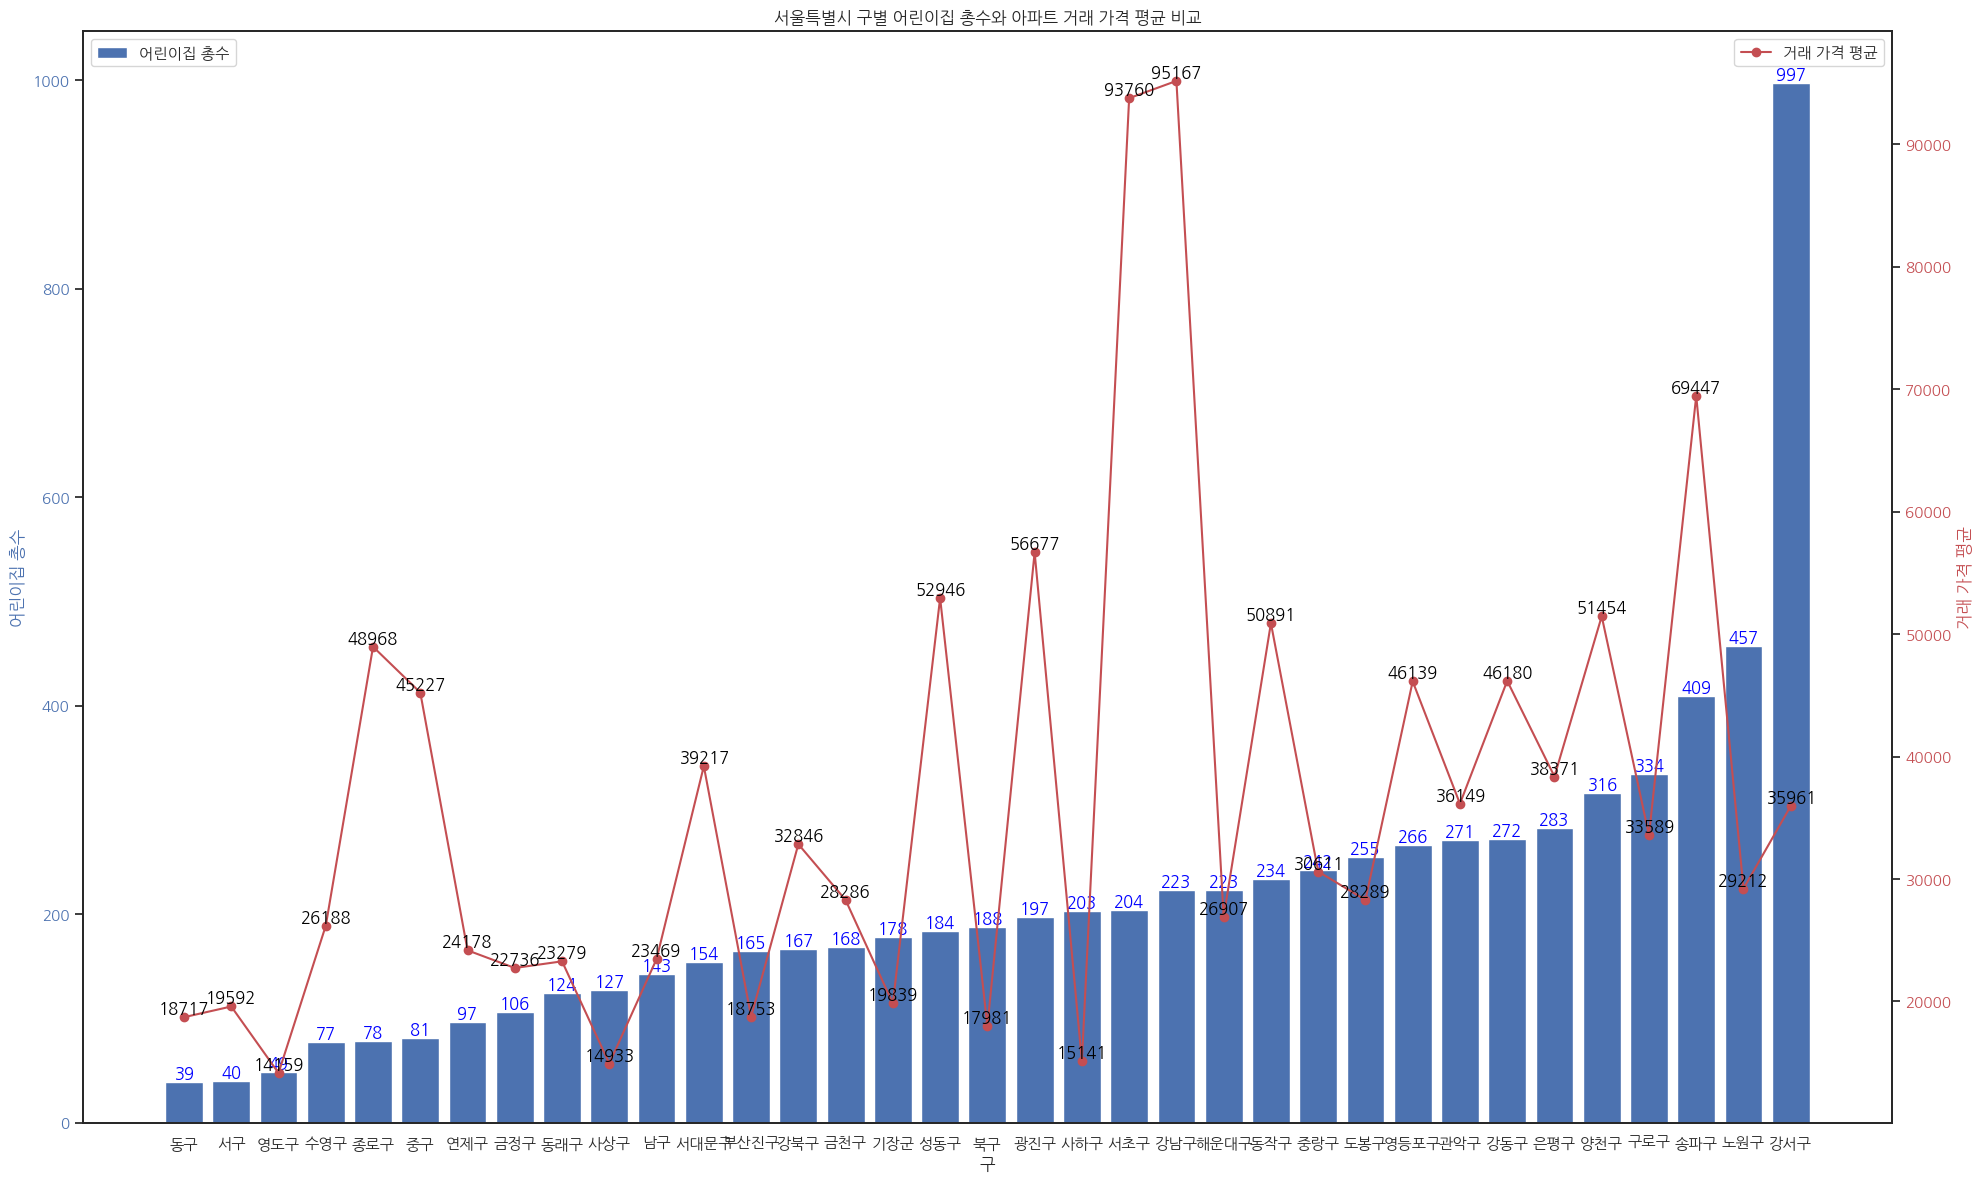

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import urllib.request
import os

# Nanum Gothic 폰트 다운로드
font_url = 'https://github.com/google/fonts/raw/main/ofl/nanumgothic/NanumGothic-Regular.ttf'
font_path = '/content/NanumGothic-Regular.ttf'  # Google Colab에서 사용 가능한 경로로 수정

# 지정한 경로에 폰트가 없으면 다운로드
if not os.path.exists(font_path):
    urllib.request.urlretrieve(font_url, font_path)

# 다운로드한 폰트를 matplotlib에서 사용하도록 설정
font_manager.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

# 데이터 로드
day_care_data = pd.read_csv('/content/sample_data/Apartment_Price/day_care_center.csv')
apartment_data = pd.read_csv('/content/sample_data/Apartment_Price/train.csv')

# 어린이집 데이터와 아파트 데이터 병합
day_care_counts = day_care_data.groupby('gu')['day_care_name'].count()
apartment_prices = apartment_data.groupby('gu')['transaction_real_price'].mean()

# 어린이집 개수와 거래 가격 데이터 병합
merged_data = pd.DataFrame({'day_care_counts': day_care_counts, 'transaction_real_price': apartment_prices}).dropna()

# 어린이집 총수 기준으로 정렬
merged_data_sorted = merged_data.sort_values(by='day_care_counts')

# 시각화 시작
fig, ax1 = plt.subplots(figsize=(20, 12))

# X축: 구 이름 (정렬된 상태)
gu_names_sorted = merged_data_sorted.index

# 첫 번째 Y축: 어린이집 총수 (막대 그래프)
bars = ax1.bar(gu_names_sorted, merged_data_sorted['day_care_counts'], color='b', label='어린이집 총수')
ax1.set_xlabel('구')
ax1.set_ylabel('어린이집 총수', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# 막대 위에 수치 표시
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', color='blue')

# 두 번째 Y축: 거래 가격 평균 (선 그래프)
ax2 = ax1.twinx()
ax2.plot(gu_names_sorted, merged_data_sorted['transaction_real_price'], color='r', marker='o', label='거래 가격 평균')
ax2.set_ylabel('거래 가격 평균', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# 선 위에 수치 표시
for i, price in enumerate(merged_data_sorted['transaction_real_price']):
    ax2.text(i, price, f'{int(price)}', ha='center', va='bottom', color='black')

# 그래프 제목
plt.title('서울특별시 구별 어린이집 총수와 아파트 거래 가격 평균 비교')

# 레전드 설정
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 그래프 표시
plt.xticks(rotation=90)  # 구 이름이 잘 보이도록 X축 라벨 회전
plt.tight_layout()  # 레이아웃 조정
plt.show()  # 그래프 출력

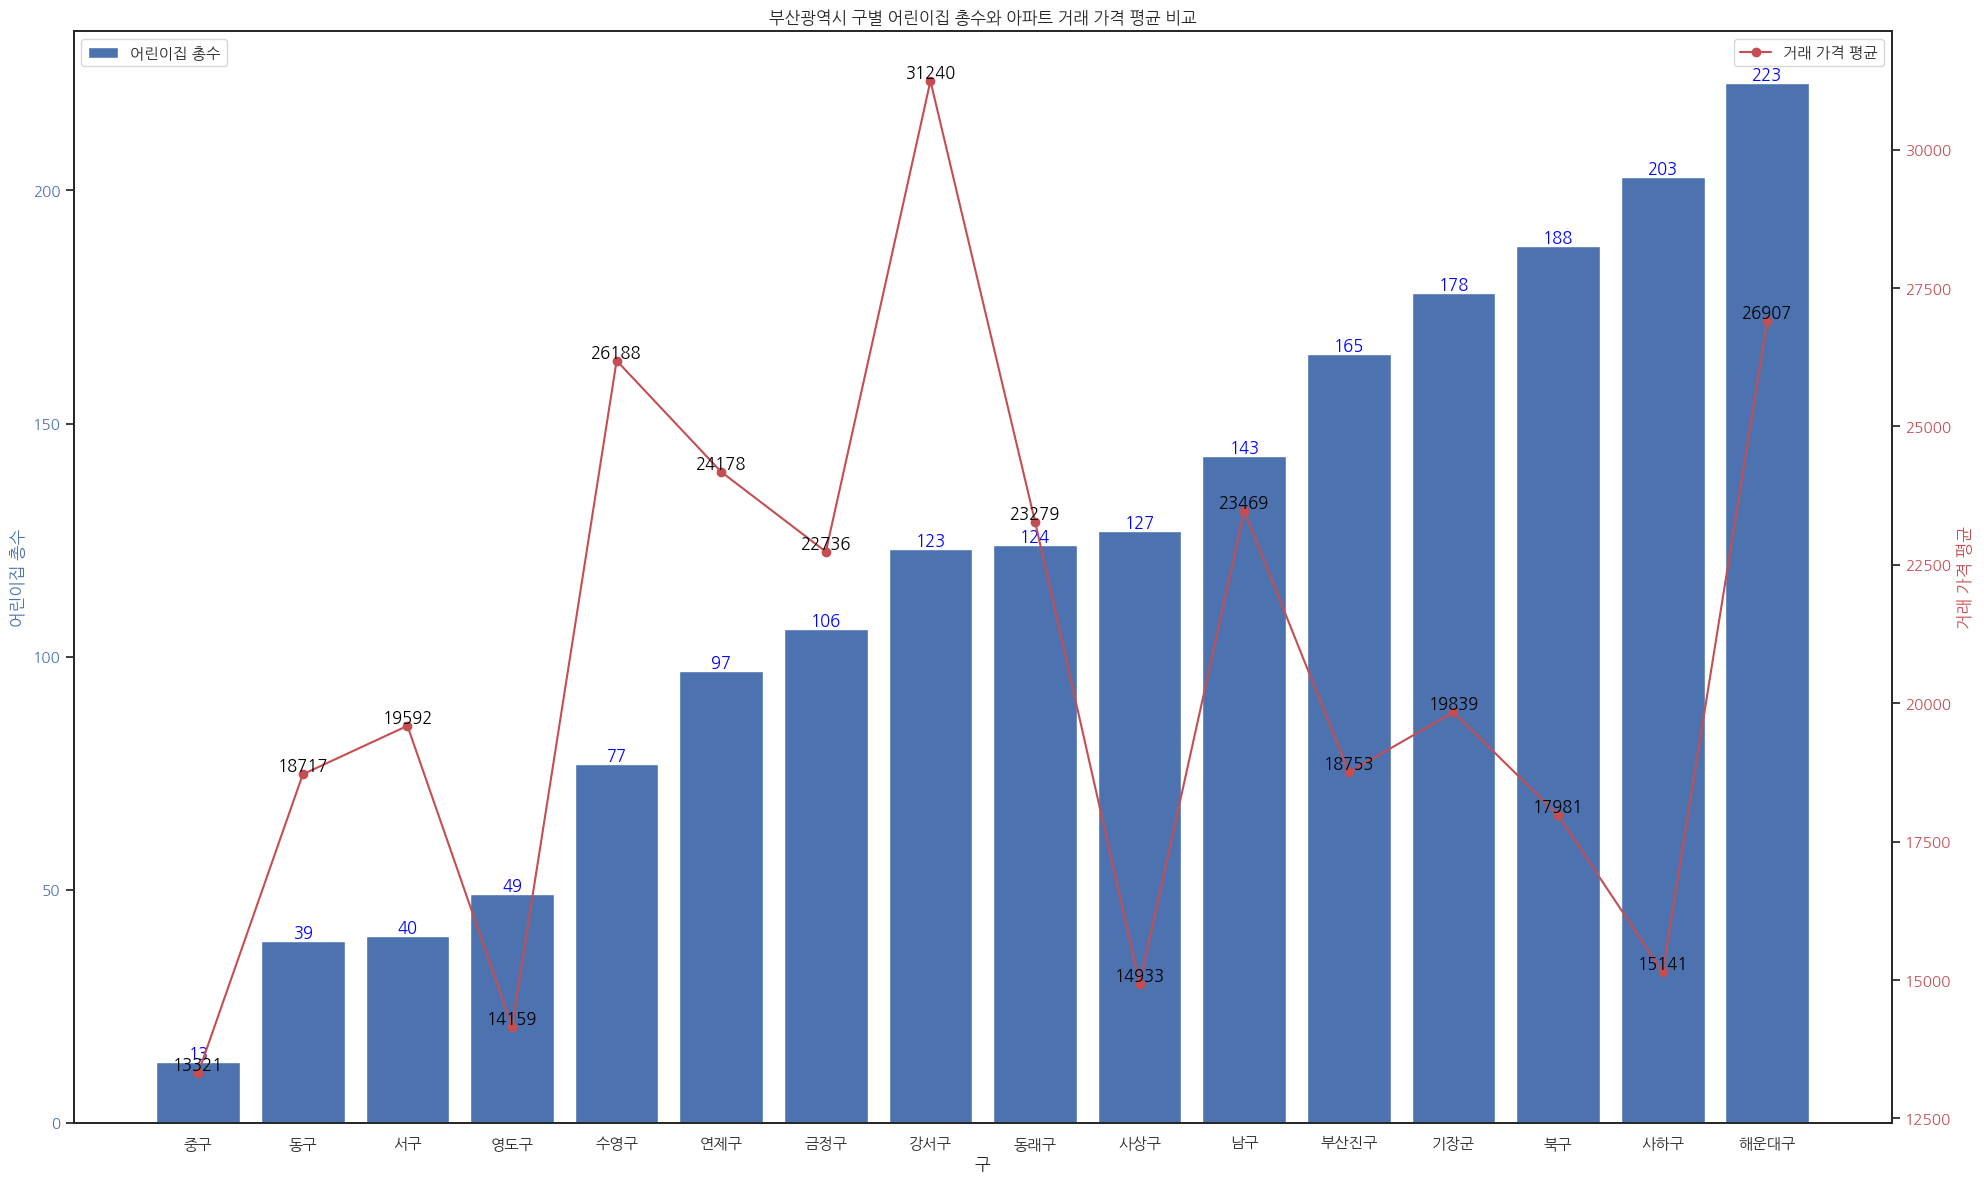

In [27]:
# 부산 데이터 필터링: 부산광역시에 해당하는 어린이집 데이터와 아파트 데이터만 추출
busan_day_care_data = day_care_data[day_care_data['city'] == '부산광역시']
busan_apartment_data = apartment_data[apartment_data['city'] == '부산광역시']

# 어린이집 데이터에서 구별 어린이집 개수를 계산
busan_day_care_counts = busan_day_care_data.groupby('gu')['day_care_name'].count()

# 아파트 데이터에서 구별 거래 가격의 평균을 계산
busan_apartment_prices = busan_apartment_data.groupby('gu')['transaction_real_price'].mean()

# 어린이집 개수와 거래 가격 평균을 하나의 데이터프레임으로 병합 (결측치 제거)
busan_merged_data = pd.DataFrame({'day_care_counts': busan_day_care_counts, 'transaction_real_price': busan_apartment_prices}).dropna()

# 어린이집 총수 기준으로 데이터를 정렬
busan_merged_data_sorted = busan_merged_data.sort_values(by='day_care_counts')

# 시각화 시작: 새로운 그래프와 축을 설정
fig, ax1 = plt.subplots(figsize=(20, 12))

# X축: 정렬된 구 이름
busan_gu_names_sorted = busan_merged_data_sorted.index

# 첫 번째 Y축: 어린이집 총수를 막대 그래프로 표시
bars = ax1.bar(busan_gu_names_sorted, busan_merged_data_sorted['day_care_counts'], color='b', label='어린이집 총수')
ax1.set_xlabel('구')  # X축 레이블 설정
ax1.set_ylabel('어린이집 총수', color='b')  # Y축 레이블 설정
ax1.tick_params(axis='y', labelcolor='b')  # Y축 레이블 색상 설정

# 막대 위에 어린이집 수치 표시
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', color='blue')

# 두 번째 Y축: 거래 가격 평균을 선 그래프로 표시
ax2 = ax1.twinx()  # 두 번째 Y축 생성
ax2.plot(busan_gu_names_sorted, busan_merged_data_sorted['transaction_real_price'], color='r', marker='o', label='거래 가격 평균')
ax2.set_ylabel('거래 가격 평균', color='r')  # 두 번째 Y축 레이블 설정
ax2.tick_params(axis='y', labelcolor='r')  # 두 번째 Y축 레이블 색상 설정

# 선 위에 거래 가격 수치 표시
for i, price in enumerate(busan_merged_data_sorted['transaction_real_price']):
    ax2.text(i, price, f'{int(price)}', ha='center', va='bottom', color='black')

# 그래프 제목 설정
plt.title('부산광역시 구별 어린이집 총수와 아파트 거래 가격 평균 비교')

# 그래프 레전드 설정
ax1.legend(loc='upper left')  # 첫 번째 Y축 레전드 위치 설정
ax2.legend(loc='upper right')  # 두 번째 Y축 레전드 위치 설정

# 그래프 표시: X축 레이블이 잘 보이도록 회전
plt.xticks(rotation=90)  # 구 이름이 잘 보이도록 X축 라벨 회전
plt.tight_layout()  # 레이아웃 조정
plt.show()  # 그래프 출력